# Prediction of Heart Failure Mortality [100 points total]


**Heart Failure** (HF) is a life-threating contition in which the heart fails to perfuse the body with blood.  In this prelab, we will predict patients' mortaility from this condition from clinical data using **Logistic Regression**.  Unlike linear regression, logistic regression is used to predict binary or categorical outcomes.  The ability to predict mortality from past cases can help clinitians make better treatment predictions in the future.

### 1) Load Data [5 points]
We have given you a spreadsheet file `hf.xlsx` containing clinical data from nearly 300 patients.  The data comes from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records). Each row represents a single patient and each column represents a clinical feature.  Decriptions of each feature can be found in the orignal paper [Ahmad *et al.* 2017](https://doi.org/10.1371/journal.pone.0181001) as well as [Chicco and Jurman 2020](https://doi.org/10.1186/s12911-020-1023-5). The last column, labeled **death_event** indicates whether the condition was fatal for the patient. We have given you the function `readxlsx` to read the spreadsheat into a **pandas** `DataFrame`.

* Use `pd.read_excel` the data into a dataframe named **`df`**.  Then display the first 10 rows

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None # Tell pandas to display all columns

try:
    import os
    from google.colab import drive
    drive.mount("/content/drive/")
    os.chdir("/content/drive/My Drive/")
except:
    pass

"""
Write your code here
"""
df = pd.read_excel("hf.xlsx")
df.head(10)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### 2) Data Cleaning [10 points]
 * In our dataset the **`time`** column represents the number of days after diagnosis that the patient followed up with a physician. Since this is not a clinical measure, remove this column from the data frame.  Then display the first 10 rows of the updated data frame.

In [87]:
"""
Write your code here
"""

# remove the time column
df = df.drop(columns=["time"])
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,1


### 3) Specify Features and Target [10 points]
 * Define **`X`** as a dataframe of consisting of all columns except the last one.  These will be our features [4 points].  
 * Then define target **`y`** as the last column containing mortality data [3 points].
 * Display the shape of your original dataframe `df` followed by `X` and `y` to verify that you did this correctly [3 points].

In [88]:
"""
Write your code here
"""

X = df.drop(columns=['death_event']) # all columns except last
y = df['death_event'] # target: death_event

print(f"Df shape: {df.shape}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Df shape: (299, 12)
X shape: (299, 11)
y shape: (299,)


### 4) Data Exploration [15 points]

We can look at the relationships clinical features to get a general idea of how features relate to each other. The titles of the columns represent the clinical features.  
  * The classes are unbalanced as there are fewer fatal cases than non-fatal ones. Report the percentage of cases that were fatal rounded to 1 decimal places [5 points].
  * Plot a bar graph of the correlations of each feature with the target [10 points]

Percentage of fatal cases: 32.1%


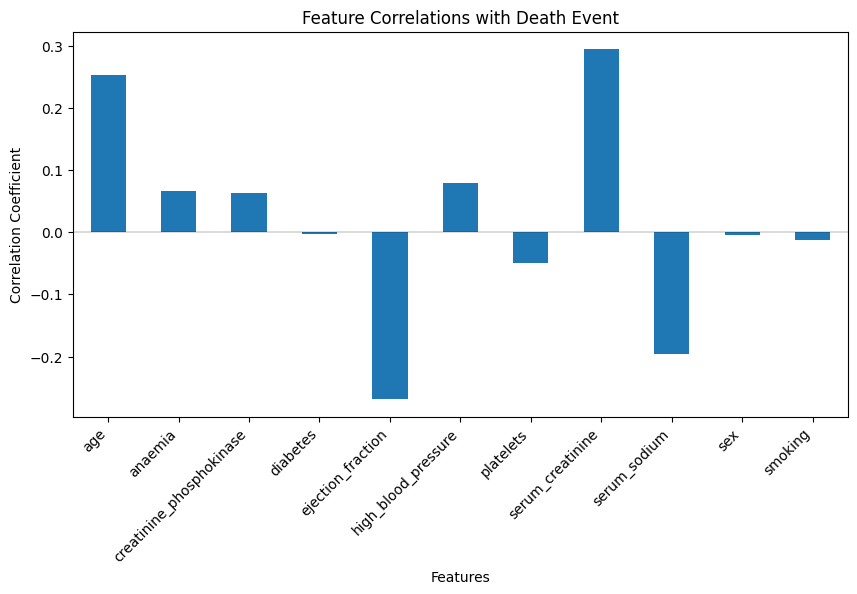

In [89]:
"""
Write your code here
"""

# percentage of fatal cases
fatal_percentage = np.sum(y) / len(y) * 100
print(f"Percentage of fatal cases: {fatal_percentage:.1f}%")

# bar graph of the correlations of each feature with the target
correlations = X.corrwith(y)
correlations.plot(kind="bar", figsize=(10, 5))

plt.title("Feature Correlations with Death Event")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.axhline(0, color='black', linewidth=0.2) # add a horizontal line at y=0 for reference
plt.xticks(rotation=45, ha='right')
plt.show()

### 5) Standardization [10 points]

Numerical columns in **`X`** in have very different magnitudes. When training the a model, columns with larger magnitudes can dominate the learning process and bias the model towards those features. Therefore, **standardization** of features is needed to produce a less biased model. After standardizing the columns, values will be transformed, and each column would have **zero mean** (mean or average = 0) and **unit variance** (variance = 1).  This is equivelant to converting each features values to it's corresponding **z-score**.

* Use sklearn's `StandardScaler` to standardize these columns. Then display the first 10 rows of the results of standardization.

In [90]:
from sklearn.preprocessing import StandardScaler

"""
Write your code here
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682
5,2.456114,1.147968,-0.552141,-0.847579,0.162199,1.359272,-6.079240e-01,0.683709,-1.050016,0.735688,1.454161
6,1.192945,1.147968,-0.346704,-0.847579,-1.953749,-0.735688,-1.396531e+00,-0.187726,0.085034,0.735688,-0.687682
7,-0.070223,1.147968,-0.275472,1.179830,1.854958,-0.735688,1.952488e+00,-0.284552,-1.277026,0.735688,1.454161
8,0.350833,-0.871105,-0.438583,-0.847579,2.278147,-0.735688,7.535660e-09,0.102752,0.312044,-1.359272,-0.687682
9,1.614001,1.147968,-0.473683,-0.847579,-0.260991,1.359272,1.276539e+00,7.752020,-0.823006,0.735688,1.454161


### 6) Train-Test Split [5 points]

Now, let's perform **train-test** split on the data.


* Use **`train_test_split`** to perform a train-test split on `X` and `y`. Set the `test_size` as 0.5. Since the diagnostic class is unbalanced, we reccomend that you use the **`stratify`** option to ensure that fatal cases are evenly distrubuted amoung the train and test cases.


In [91]:
from sklearn.model_selection import train_test_split
"""
Write your code here
"""
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, stratify=y)

### 7) Train model [10 points]

We are ready now to train a our model.  
* We have imported `LogisticRegression` from `sklearn.linear_model`. Train a logistic regression model on the **training** data [5 points].  
* Then report the accuracy of this model on the **testing** data using `accuracy_score` [5 points].

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
"""
Write your code here
"""
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on testing data: {accuracy:.4f}")

Model accuracy on testing data: 0.7467


### 8) Refine Hyperparameter [15 points]
A **hyperparameter** is a constant value that is specified before optimzation.
One of the primary hyperparameters is the regularization constant $\lambda = \frac{1}{C}$. By default `LogisticRegression` uses a default value of $C=1$

 * Refine this model by estimating an optimal value for $C = \frac{1}{\lambda}$ using **k-fold Cross Validation** on the **training data**.  The funcion [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) from `sklearn.model_selection` splits the training data set into smaller class stratified chunks that can be fed into the model. Use $k=5$ splits (folds) and several values for $C \in [0.001, 1000]$.  Calculate the mean accuracy for each $C$ value across the folds [10 points].
 * The best $C$ value is the one with the highest accuracy.  Display this value [5 points]

In [93]:
from sklearn.model_selection import StratifiedKFold
"""
Write your code here
"""

# estimate accuracy for different C values using 5-fold cross-validation
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kf = StratifiedKFold(n_splits=5)
mean_accuracies = []

for C in C_values:
    fold_accuracies = []

    for train_index, test_index in kf.split(X_train, y_train):
        X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
        y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
        model = LogisticRegression(C=C)
        model.fit(X_fold_train, y_fold_train)

        y_fold_pred = model.predict(X_fold_test)
        fold_accuracy = accuracy_score(y_fold_test, y_fold_pred)
        fold_accuracies.append(fold_accuracy)
    
    mean_accuracy = np.mean(fold_accuracies)
    mean_accuracies.append(mean_accuracy)

# display C value with the highest accuracy
best_C = C_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)
print("Best C value:")
print(f"{best_C} with mean accuracy {best_accuracy:.4f}")


Best C value:
1 with mean accuracy 0.7384


### 9) Retrain Model [10 points]
 * Retrain your model on **training** data using your best regularization hyperparameter $C$ from the previous step [5 points]
 * Then report the accuracy of this model on the **testing** data using `accuracy_score` [5 points].

In [94]:
"""
Write your code here
"""
# retrain mode on training data using best_C
model = LogisticRegression(C=best_C)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with C = {best_C}: {accuracy:.4f}")

Model accuracy with C = 1: 0.7467


### 10) Logistic Regression Coefficients [10 points]
The coefficients vector $\hat \beta$ from the model tells us the prediction of how feature in $X$ relates to the target $y$. If $\hat \beta_k > 0$  then the $k$th feature is predicted to increase the likelyhood of heart failure while $\hat \beta_k < 0$ decreases the likehood.
 * Use the model's `.coef[0]` attribute to make a bar graph of the coefficient values for each feature

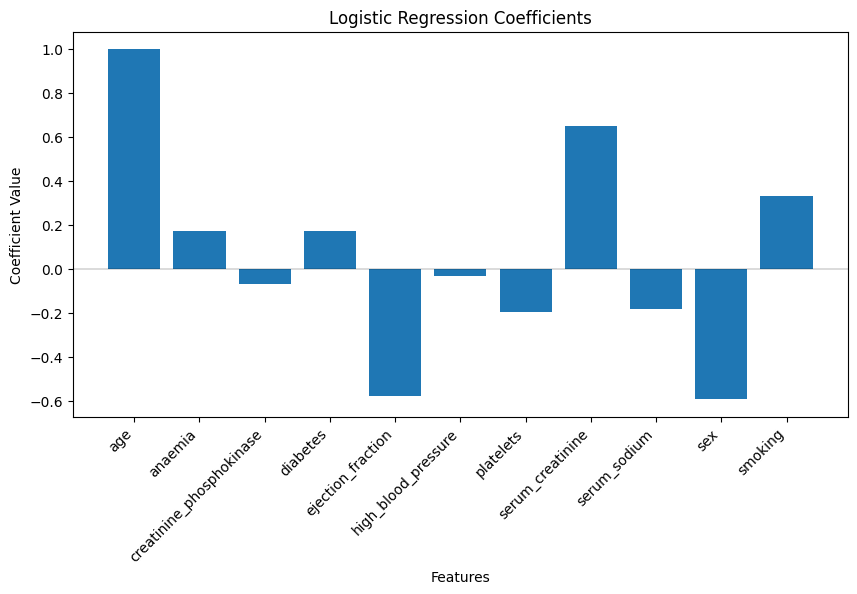

In [95]:
"""
Write your code here
"""

# bar graph of the coefficient values for each feature of best model
coefficients = model.coef_[0]
plt.figure(figsize=(10, 5))
plt.bar(X.columns, coefficients)
plt.xticks(rotation=45, ha='right')
plt.title("Logistic Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.axhline(0, color='black', linewidth=0.2)
plt.show()